<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_04_Crea_tu_primera_estrategia_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Crea tu primera estrategia de trading


### Resumen
* Gestionar los datos
* Media móvil
* Estrategia
* Gráfico
* Calcular el beneficio
* Automatización
* Comparar la estrategia con datos procedentes de diferentes fuentes

<br>



💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

In [2]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler

colors = cycler(
    "color", ["#669FEE", "#66EE91", "#9988DD", "#EECC55", "#88BB44", "#FFBBBB"]
)
plt.rc("figure", facecolor="#313233")
plt.rc(
    "axes",
    facecolor="#313233",
    edgecolor="none",
    axisbelow=True,
    grid=True,
    prop_cycle=colors,
    labelcolor="gray",
)
plt.rc("grid", color="474A4A", linestyle="solid")
plt.rc("xtick", color="gray")
plt.rc("ytick", direction="out", color="gray")
plt.rc("legend", facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

#  Gestionar los datos



In [3]:
# Función de preprocesado


def preprocessing(name):
    # Importar los datos
    df = pd.read_csv(
        name, delimiter="\t", index_col="<DATE>", parse_dates=True
    ).dropna()

    # Eliminar las últimas dos columnas
    df = df.iloc[:, :-2]

    # Renombrar
    df.columns = ["open", "high", "low", "close", "volume"]
    df.index.name = "time"

    return df

In [4]:
def preprocessing_yf(symbol):
    # Importar los datos
    df = yf.download(symbol).dropna()

    # Renombrar
    df.columns = ["open", "high", "low", "close", "adj close", "volume"]
    df.index.name = "time"

    # Eliminar la columna adj close
    del df["adj close"]

    return df

In [5]:
df = preprocessing_yf("EURUSD=X")

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,open,high,low,close,volume
time,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0
...,...,...,...,...,...
2023-07-24,1.112533,1.114504,1.106880,1.112533,0
2023-07-25,1.106317,1.108893,1.102208,1.106317,0
2023-07-26,1.105046,1.108647,1.103838,1.105046,0


# Media móvil

In [7]:
# SMA = Media Móvil Simple (simple moving average)
# df["close"] = En la columna "close"
# rolling(3) = Desplazar filas  en 3
# mean() = Calcular el promedio
df["SMA fast"] = df["close"].rolling(3).mean()
df

,open,high,low,close,volume,SMA fast
time,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,0,NaN
2003-12-03,1.209000,1.213003,1.207700,1.212298,0,1.205899
2003-12-04,1.212004,1.214403,1.204398,1.208094,0,1.209763
2003-12-05,1.207802,1.219096,1.206593,1.218695,0,1.213029
...,...,...,...,...,...,...
2023-07-24,1.112533,1.114504,1.106880,1.112533,0,1.115589
2023-07-25,1.106317,1.108893,1.102208,1.106317,0,1.110853
2023-07-26,1.105046,1.108647,1.103838,1.105046,0,1.107965


In [8]:
# Crear simple moving average de 30 dias
df["SMA fast"] = df["close"].rolling(30).mean()

# Simple Moving Average
df["SMA slow"] = df["close"].rolling(60).mean()

<Axes: xlabel='time'>

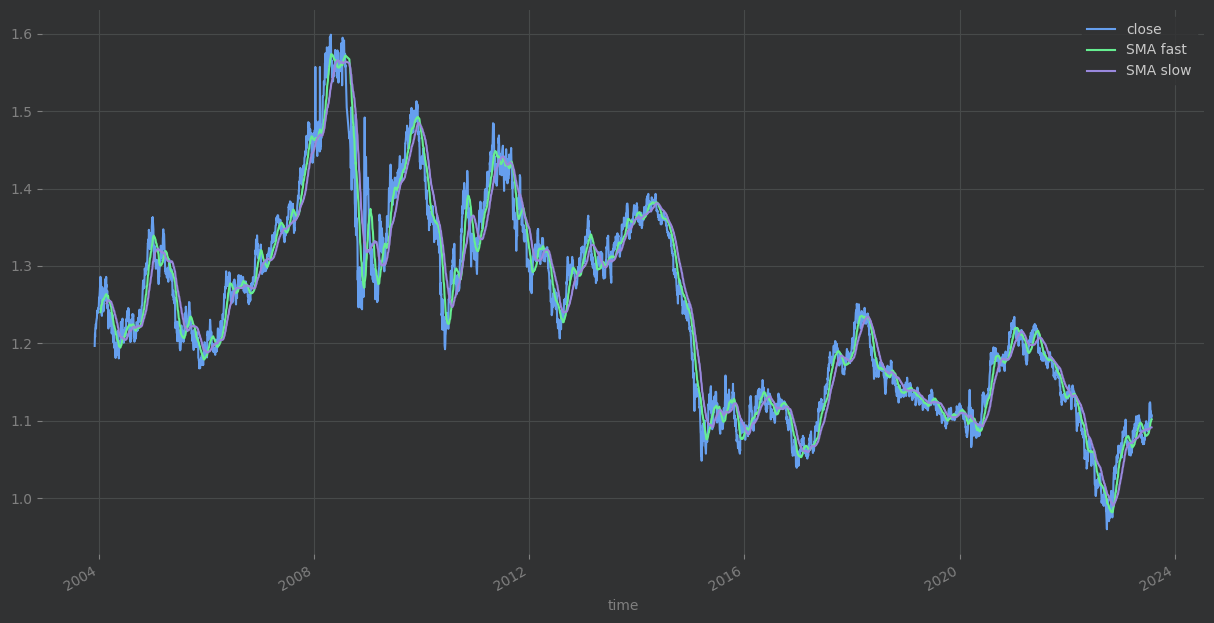

In [9]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].plot(figsize=(15, 8))

<Axes: xlabel='time'>

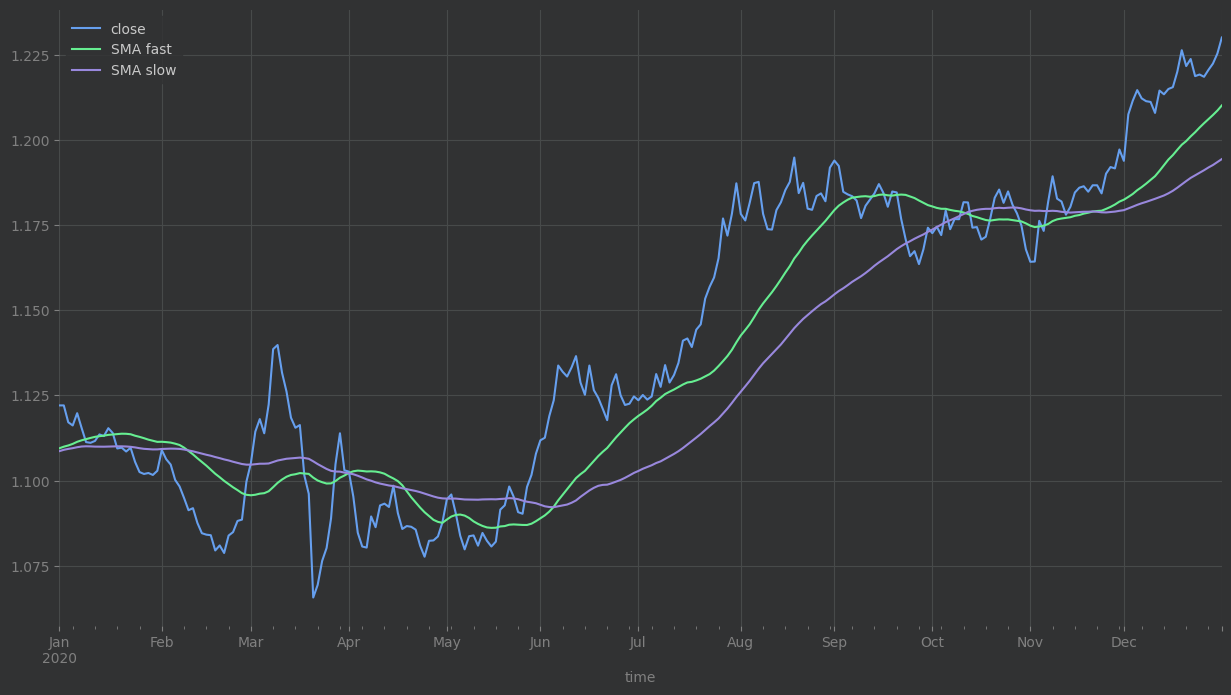

In [10]:
# Plot the result
df[["close", "SMA fast", "SMA slow"]].loc["2020"].plot(figsize=(15, 8))

# Estrategia

In [11]:
df["position"] = np.nan

# Create the condition
# loc = localizar donde SMA fast sea mayor a SMA slow, llenamos con 1
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
# loc = localizar donde SMA fast sea menor a SMA slow, llenamos con -1
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1

# Verificación gráfica

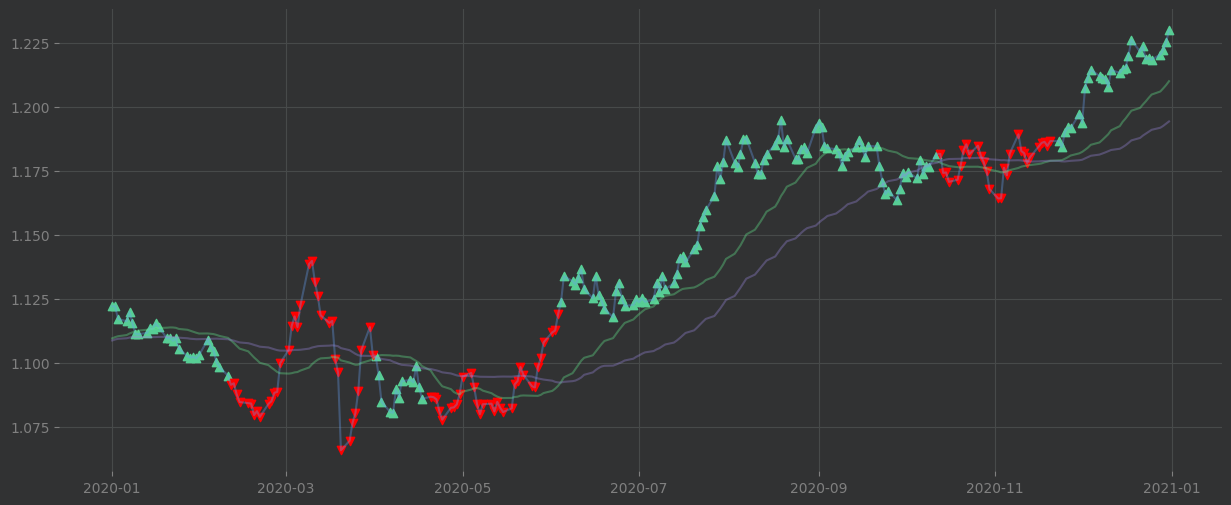

In [12]:
# Representamos toda la senal para asegurarnos de que sea correcta

year = "2020"

# Seleccionar toda la senal en una lista de indices para representar solo estos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index

# Adaptar el size del grafico
plt.figure(figsize=(15, 6))


# Representar los puntos de la senal larga 'Open' en verde y la 'sell' en rojo
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color="#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color="red", marker="v")

# Representar la resistencia para asegurarse de que las condiciones se completan
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)

plt.show()

# Calcular las ganancias

<Axes: xlabel='time'>

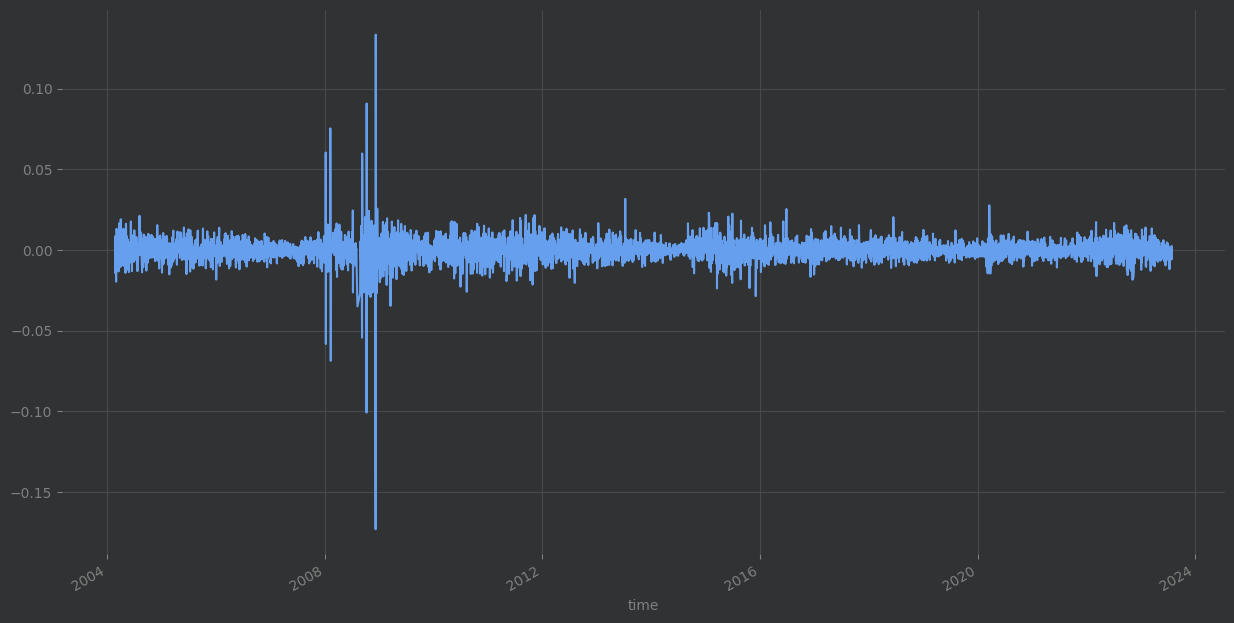

In [13]:
# Calcular el porcentaje de variacion del activo
# df["close"] = Tomar el valor todos los dias al cierre
# pct_change(1) = calcular el porcentaje de variacion del valor del dia anterior
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia
# df["position"].shift(1) =
df["return"] = df["pct"] * df["position"].shift(1)

df

df["return"].plot(figsize=(15, 8))

<Axes: xlabel='time'>

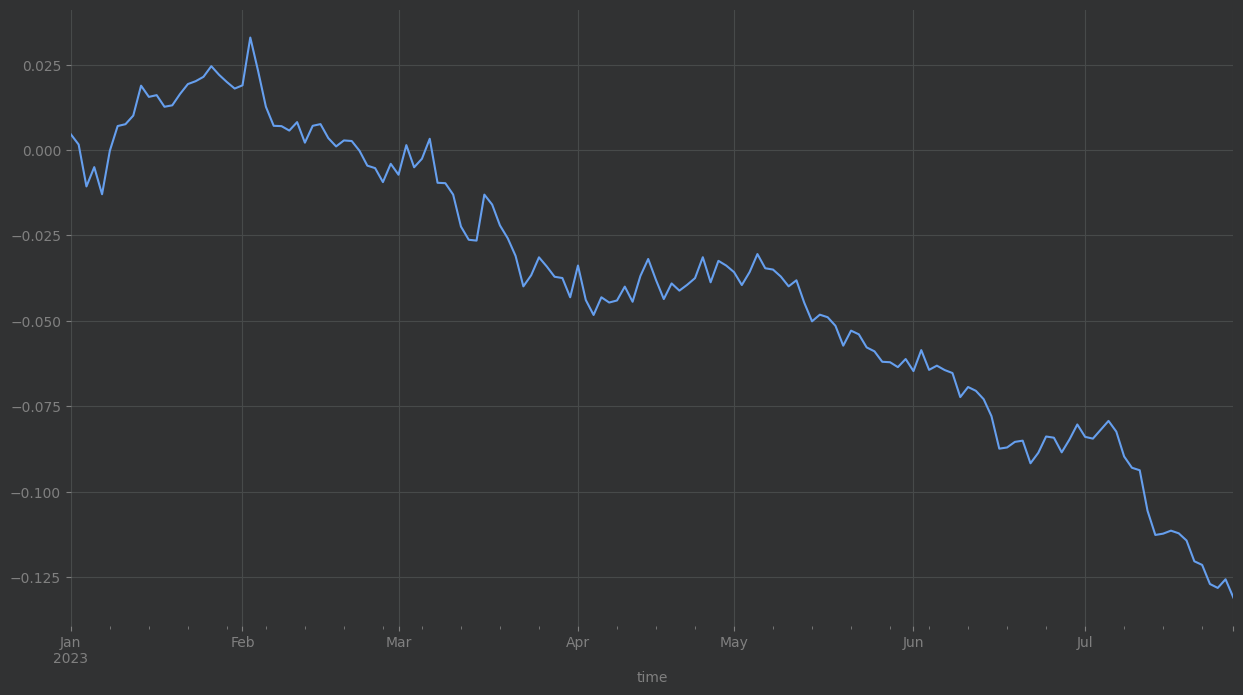

In [14]:
# Balance diario()
# Balance acumulado
df["return"].loc["2023"].cumsum().plot(figsize=(15, 8))

# Automatización

In [15]:
# Estrategia Simple Moving Average
def SMA_strategy(input, mt5=False, yf=False):
    if mt5:
        df = preprocessing(input)

    if yf:
        df = preprocessing_yf(input)

    # Crear resistencia mediante un maximo rodante
    df["SMA fast"] = df["close"].rolling(30).mean()

    # Crear soporte mediante un minimo rodante
    df["SMA slow"] = df["close"].rolling(60).mean()

    df["position"] = np.nan

    # Crear la condicion
    df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
    df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1

    df["pct"] = df["close"].pct_change(1)

    # Calcular la rentabilidad de la estrategia
    df["return"] = df["pct"] * (df["position"].shift(1))

    return df["return"]

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='time'>

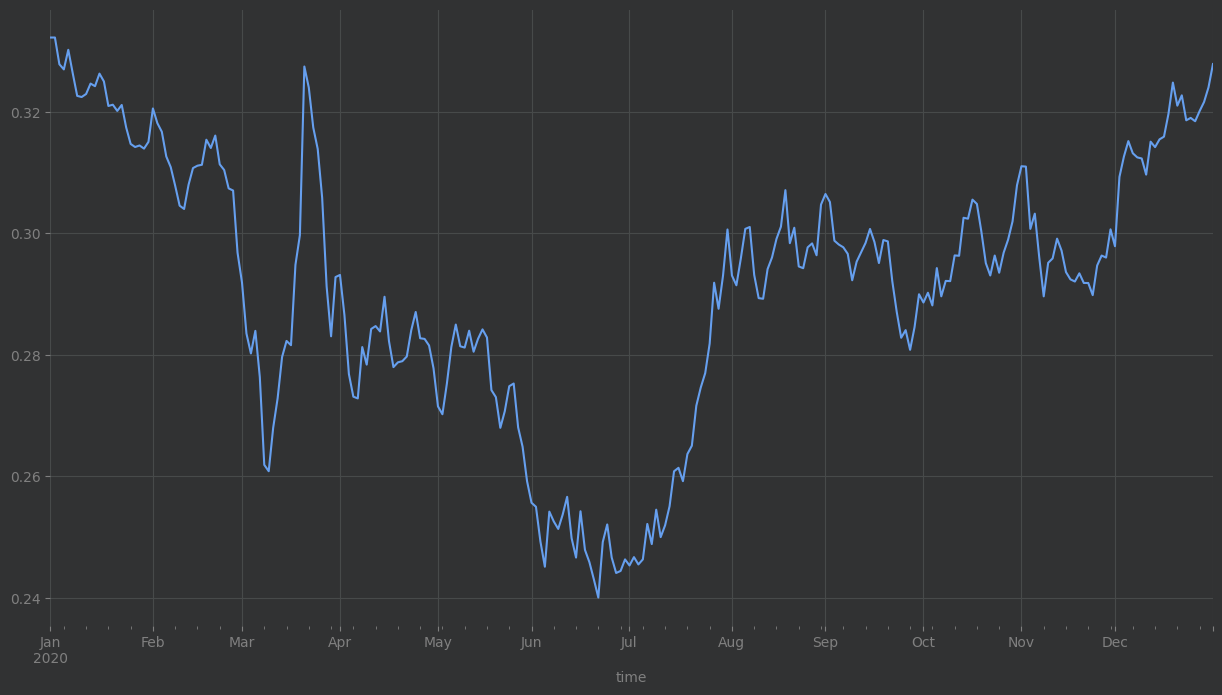

In [16]:
SMA_strategy("EURUSD=X", yf=True).cumsum().loc["2020"].plot(figsize=(15, 8))

<Axes: xlabel='time'>

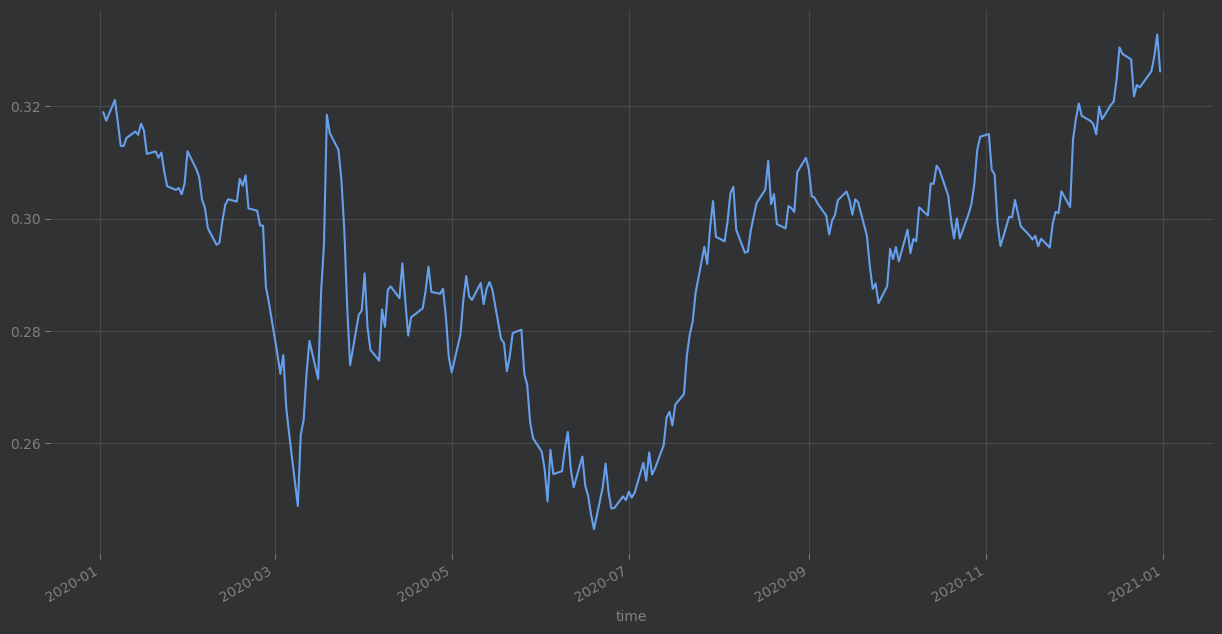

In [17]:
SMA_strategy("./FOREX D1/EURUSD_D1.csv", mt5=True).cumsum().loc["2020"].plot(
    figsize=(15, 8)
)

# Comparar la estrategia con diferentes datos

[*********************100%***********************]  1 of 1 completed


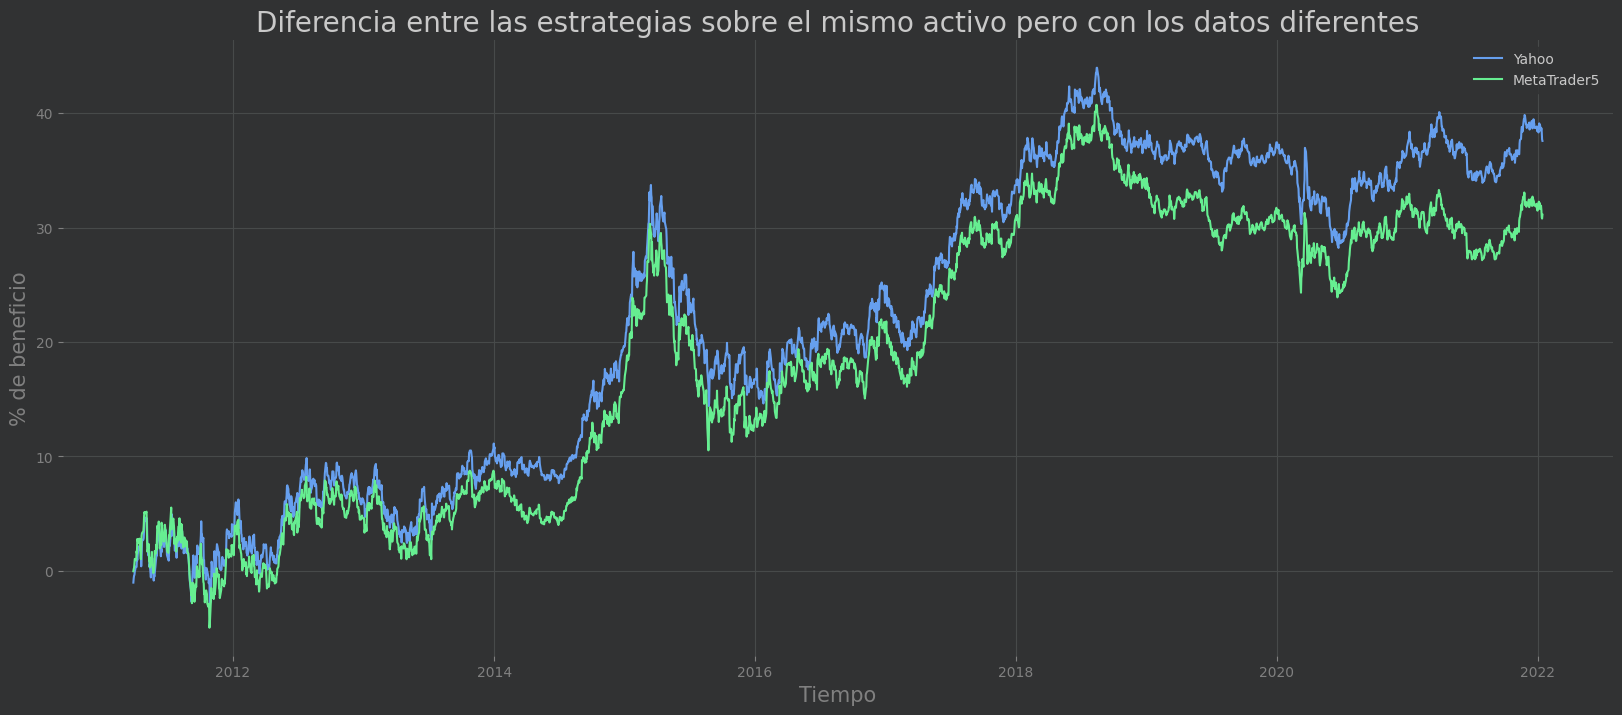

In [29]:
# La misma estrategia pero con diferente activos
yahoo = SMA_strategy("EURUSD=X", yf=True)
metatrader = SMA_strategy("./FOREX D1/EURUSD_D1.csv", mt5=True)

returns = (
    pd.DataFrame([yahoo, metatrader], index=["Yahoo", "Broker"])
    .transpose()
    .dropna()
    .cumsum(axis=0)
)

# Representar el grafico

# Adaptamos el size
plt.figure(figsize=(20, 8))

# Representar el retorno
plt.plot(returns["Yahoo"] * 100, label="Yahoo")
plt.plot(returns["Broker"] * 100, label="MetaTrader5")

# Titulo y nombre de los ejes
plt.xlabel("Tiempo", size=15)
plt.ylabel("% de beneficio", size=15)
plt.title(
    "Diferencia entre las estrategias sobre el mismo activo pero con los datos diferentes",
    size=20,
)

# Leyenda
plt.legend()
plt.show()